In [1]:
# importing packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the 'Car Fuel Efficiency' dataset

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

df = pd.read_csv(url)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# preparing the dataset

df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
# skewness and excess kurtosis of 'fuel_efficiency_mpg'

print("Skewness of 'fuel_efficiency_mpg':", df['fuel_efficiency_mpg'].skew()) # -0.012
print("Excess kurtosis of 'fuel_efficiency_mpg':", df['fuel_efficiency_mpg'].kurt()) # 0.023 => leptokurtic distribution

Skewness of 'fuel_efficiency_mpg': -0.012062219273507958
Excess kurtosis of 'fuel_efficiency_mpg': 0.022732244497634557


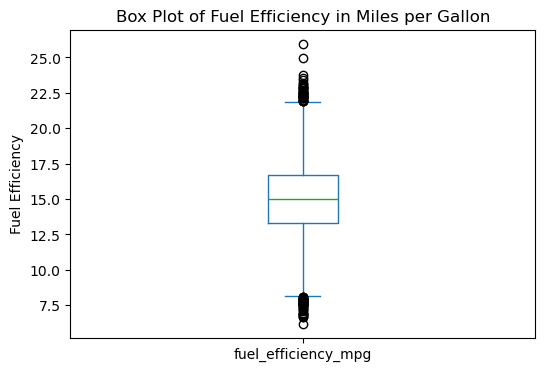

In [5]:
# box plot of 'fuel_efficiency_mpg'

plt.figure(figsize=(6, 4))

df['fuel_efficiency_mpg'].plot(kind='box', title='Box Plot of Fuel Efficiency in Miles per Gallon')
plt.ylabel('Fuel Efficiency')
plt.xlabel(' ')

plt.show()

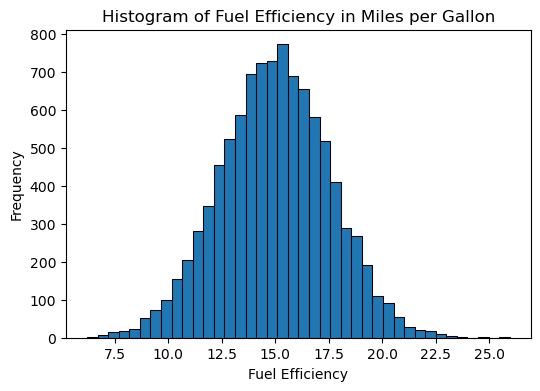

In [6]:
# histogram of 'fuel_efficiency_mpg'

plt.figure(figsize=(6, 4))

sns.histplot(df['fuel_efficiency_mpg'], bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Histogram of Fuel Efficiency in Miles per Gallon')

plt.show()

QUESTION 1

In [7]:
# columns with missing values

df.isnull().sum() # only column with missing entries is 'horsepower'

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

QUESTION 2

In [8]:
# median value for 'horsepower'

print("Median value of 'horsepower':", df['horsepower'].median()) # 149

Median value of 'horsepower': 149.0


QUESTION 3

In [9]:
# preparing and splitting the dataset into training/testing/validation, with a 60%/20%/20% distribution

np.random.seed(42) # random seed: 42

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [10]:
# linear regression training function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [11]:
# functions to prepare input array, first with filling 'NaN' values of 'horsepower' with 0, second with mean of 'horsepower' in training dataset

def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

mean_horsepower = df_train['horsepower'].mean()

def prepare_X_mean(df):
    df = df.fillna(mean_horsepower)
    X = df.values
    return X

In [12]:
# function to calculate RMSE

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [13]:
# training a linear regression model with 'NaN' values of 'horsepower' filled in with 0, then evaluating the model on the validation dataset using RMSE

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print("RMSE to 2dp when filling 'NaN' with 0:", round(rmse(y_val, y_pred), 2)) # 0.52

RMSE to 2dp when filling 'NaN' with 0: 0.52


In [14]:
# training a linear regression model with 'NaN' values of 'horsepower' filled in with mean, then evaluating the model on the validation dataset using RMSE


X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

print("RMSE to 2dp when filling 'NaN' with mean:", round(rmse(y_val, y_pred), 2)) # 0.46

RMSE to 2dp when filling 'NaN' with mean: 0.46


QUESTION 4

In [15]:
# regularised linear regression training function

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
# training regularised linear regression models for various values of r, and computing RMSE between y_val and y_pred

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print("RMSE to with r =", r, ":", rmse(y_val, y_pred)) # best value of r is r = 0.01

RMSE to with r = 0 : 0.5173782638837691
RMSE to with r = 0.01 : 0.517111552577407
RMSE to with r = 0.1 : 0.5187525130701819
RMSE to with r = 1 : 0.5222348802092905
RMSE to with r = 5 : 0.5228916092823562
RMSE to with r = 10 : 0.52298129796366
RMSE to with r = 100 : 0.523063623381993


QUESTION 5

In [17]:
# training linear regression models with varying random seeds (without regularisation)

rmse_array = [] # array to store RMSEs

for seed in range(10):
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    rmse_value = rmse(y_val, y_pred)
    rmse_array.append(rmse_value) # adding the RMSE value to our array

print("Standard deviation of the RMSEs to 3dp:", round(np.std(rmse_array), 3)) # 0.007

Standard deviation of the RMSEs to 3dp: 0.007


QUESTION 6

In [18]:
# training a regularised linear regression model with r = 0.001, after combining training and validation sets, and computing RMSE on the test dataset

np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True) # combining the training and validation datasets

y_full_train = df_full_train['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_full_train = prepare_X(df_full_train)
X_test = prepare_X(df_test)

w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w_0 + X_test.dot(w)

rmse_value = rmse(y_test, y_pred)

print("RMSE on the test dataset:", rmse_value) # 0.5156

RMSE on the test dataset: 0.5156261299162689
